<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/trip_ay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import files
uploaded = files.upload()

Saving trip.csv to trip (1).csv


In [70]:
import pandas as pd #데이터를 불러옴
data = pd.read_csv('trip.csv')

In [71]:
print(data.head(10)) #10개 데이터 확인

    passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0     Pamela Duffy   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1  Michelle Foster   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       Tina Combs   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3      Anthony Ray   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4  Brianna Johnson  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
5     Justin Smith   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
6     Tonya Moreno   05/03/2017 7:04:09 PM   05/03/2017 8:03:47 PM   
7     Hannah Foley   08/15/2017 5:41:06 PM   08/15/2017 6:03:05 PM   
8    Katie Whitney   02/04/2017 4:17:07 PM   02/04/2017 4:29:14 PM   
9     Amanda Jones   11/10/2017 3:20:29 PM   11/10/2017 3:40:55 PM   

  payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
0     Debit Card                6           3.34         13.0        2.76   
1     Debit Card                1           1.80         16.0        4.00  

In [72]:
data.describe() #통계적인 요약 확인

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [73]:
data.isna() #널 값 확인

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22696,False,False,False,False,False,False,False,False,False
22697,False,False,False,False,False,False,False,False,False
22698,False,False,False,False,False,False,False,False,False
22699,False,False,False,False,False,False,False,False,False


In [74]:
data.isna().sum() #결측치 확인

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


fare_amount에 3개의 결측치 확인




In [75]:
data['fare_amount'].isnull().mean()*100

np.float64(0.013215276860050218)

결측치 비율: 약 1.32 %

단순 삭제하기엔 결측치 비율이 1%를 넘었기 때문에 결과가 왜곡될 수 있음
따라서 중앙값으로 대체를 한다.

In [76]:
median_fare = data['fare_amount'].median()
data['fare_amount'].fillna(median_fare, inplace=True)

/tmp/ipython-input-3882087846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fare_amount'].fillna(median_fare, inplace=True)


In [77]:
data.isnull().sum()
data.describe()
#결측치 없음 확인


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.023543,1.835745,0.312514
std,1.304942,3.653023,13.239261,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


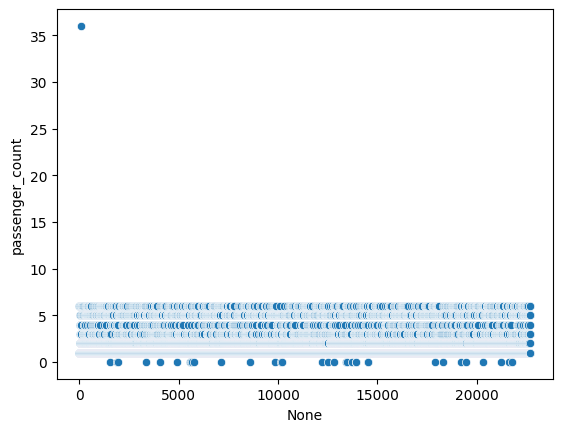

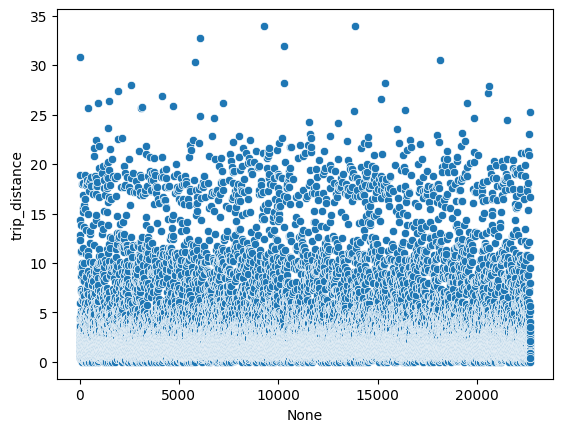

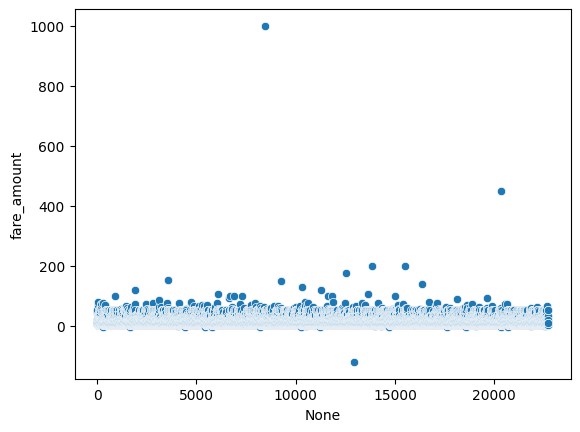

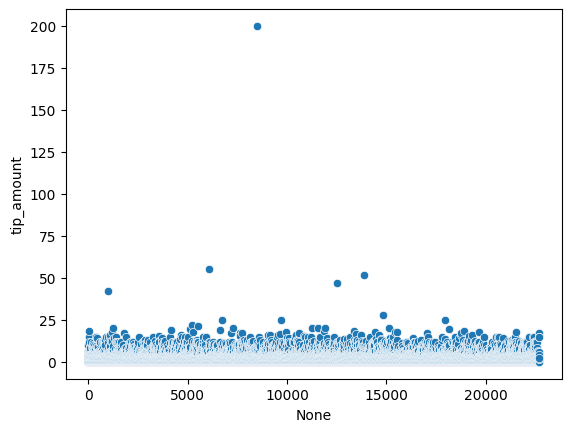

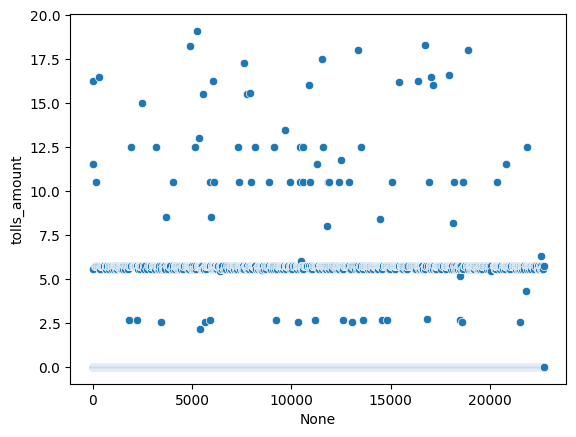

In [78]:
for col in ['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']:
    sns.scatterplot(x=data.index, y=data[col])
    plt.show() #산점도로 이상 값 확인


In [83]:
import pandas as pd
import numpy as np

# 1. 탑승객 수 이상치 (0명 미만 → 1, 6명 초과 → 6)
def passenger_func(x):
    if pd.isna(x):
        return x
    elif x < 1:
        return 1
    elif x > 6:
        return 6
    else:
        return x

# 2. 요금 이상치 (0 미만 → 0, 100 초과 → 100)
def fare_func(x):
    if pd.isna(x):
        return x
    elif x < 0:
        return 0
    elif x > 100:
        return 100
    else:
        return x

# 3. 팁 이상치 (0 미만 → 0, 20 초과 → 20)
def tip_func(x):
    if pd.isna(x):
        return x
    elif x < 0:
        return 0
    elif x > 20:
        return 20
    else:
        return x


# 적용
data['passenger_count'] = data['passenger_count'].apply(passenger_func)
data['fare_amount'] = data['fare_amount'].apply(fare_func)
data['tip_amount'] = data['tip_amount'].apply(tip_func)


In [82]:
data[['passenger_count', 'fare_amount', 'tip_amount']].describe()


,passenger_count,fare_amount,tip_amount
count,22701.000000,22701.000000,22701.000000
mean,1.643716,12.953657,1.821508
std,1.283895,10.883290,2.395573
min,1.000000,0.000000,0.000000
25%,1.000000,6.500000,0.000000
50%,1.000000,9.500000,1.350000
75%,2.000000,14.500000,2.450000
max,6.000000,100.000000,20.000000


In [86]:
import pandas as pd #오브젝트에서 데이트타임으로 바꾸기

data['tpep_pickup_datetime']  = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [88]:
data['trip_duration_min'] = (
    data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
).dt.total_seconds() / 60


In [89]:
data['trip_duration_min'].describe()
data[data['trip_duration_min'] <= 0][['tpep_pickup_datetime','tpep_dropoff_datetime','trip_duration_min']].head()


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration_min
474,2017-06-20 18:57:39,2017-06-20 18:57:39,0.0
797,2017-11-30 07:11:34,2017-11-30 07:11:34,0.0
1207,2017-01-18 17:53:45,2017-01-18 17:53:45,0.0
2442,2017-07-26 22:26:58,2017-07-26 22:26:58,0.0
2742,2017-05-12 12:49:56,2017-05-12 12:49:56,0.0


In [90]:
data[['trip_duration_min', 'trip_distance', 'fare_amount', 'tip_amount']].corr()


,trip_duration_min,trip_distance,fare_amount,tip_amount
trip_duration_min,1.000000,0.153610,0.167904,0.084622
trip_distance,0.153610,1.000000,0.913230,0.574989
fare_amount,0.167904,0.913230,1.000000,0.603875
tip_amount,0.084622,0.574989,0.603875,1.000000


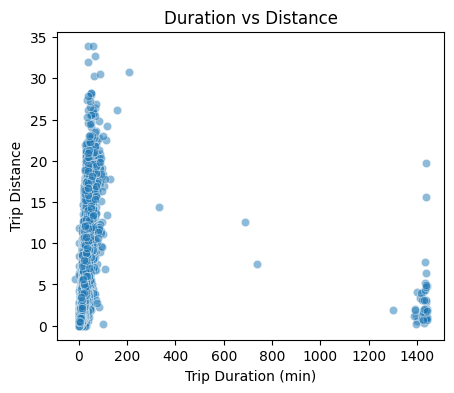

In [92]:
#주행시간vs주행거리

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='trip_duration_min', y='trip_distance', alpha=0.5)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Trip Distance')
plt.title('Duration vs Distance')
plt.show()


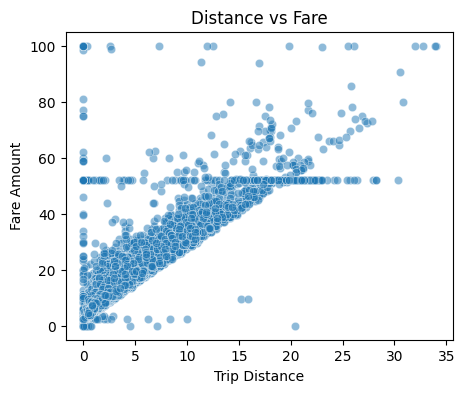

In [93]:
#주행거리 vs 요금

plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='trip_distance', y='fare_amount', alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Distance vs Fare')
plt.show()


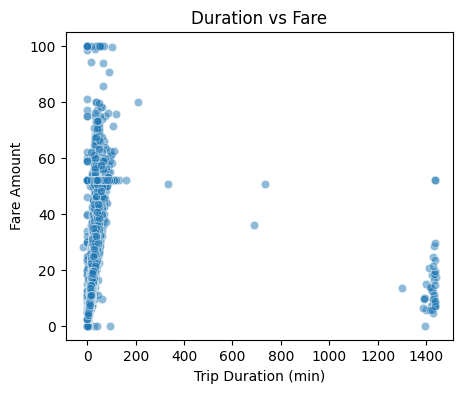

In [94]:
#주행시간 vs 요금

plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='trip_duration_min', y='fare_amount', alpha=0.5)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Fare Amount')
plt.title('Duration vs Fare')
plt.show()


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

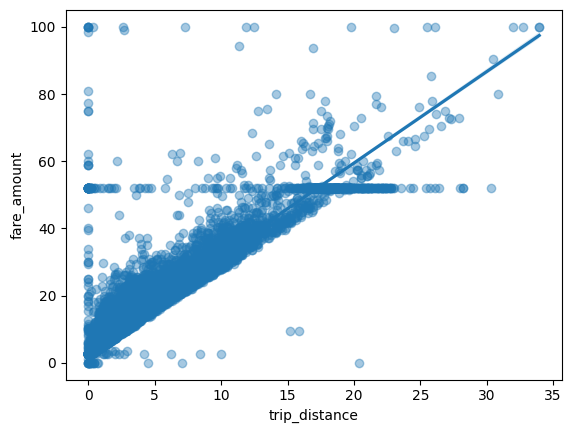

In [95]:
sns.regplot(data=data, x='trip_distance', y='fare_amount', scatter_kws={'alpha':0.4})
#추세선

In [100]:
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})


In [101]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22701 non-null  object        
 1   tpep_pickup_datetime   22701 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22701 non-null  datetime64[ns]
 3   payment_method         22701 non-null  object        
 4   passenger_count        22701 non-null  int64         
 5   trip_distance          22701 non-null  float64       
 6   fare_amount            22701 non-null  float64       
 7   tip_amount             22701 non-null  float64       
 8   tolls_amount           22701 non-null  float64       
 9   trip_duration_min      22701 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 1.7+ MB
